# Определение возраста человека по фотографии<a class="tocSkip">
<a id="start"></a>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Возраст-людей-на-фото" data-toc-modified-id="Возраст-людей-на-фото-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Возраст людей на фото</a></span></li><li><span><a href="#Размер-фото" data-toc-modified-id="Размер-фото-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размер фото</a></span></li><li><span><a href="#Создание-загрузчика" data-toc-modified-id="Создание-загрузчика-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Создание загрузчика</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Полносвязные-сети" data-toc-modified-id="Полносвязные-сети-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Полносвязные сети</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Многослойная-сеть" data-toc-modified-id="Многослойная-сеть-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Многослойная сеть</a></span></li></ul></li><li><span><a href="#Свёрточные-сети" data-toc-modified-id="Свёрточные-сети-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Свёрточные сети</a></span><ul class="toc-item"><li><span><a href="#LeNet" data-toc-modified-id="LeNet-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LeNet</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>CNN</a></span></li><li><span><a href="#VGG16" data-toc-modified-id="VGG16-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>VGG16</a></span></li><li><span><a href="#ResNet" data-toc-modified-id="ResNet-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>ResNet</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

### Записка к данным<a class="tocSkip">

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.

Необходимо построить модель, которая по фотографии определит приблизительный возраст человека.
___

Перед началом анализа импортируем необходимые библиотеки и создадим несколько функций.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Reshape, Conv2D, AveragePooling2D, Flatten, MaxPooling2D, \
                                    GlobalAveragePooling2D, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet import ResNet50

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
%matplotlib inline

In [3]:
def plot_distribution(data, xlabel, title=None, bins=90, xlim=None, figsize=(7,6)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize, gridspec_kw={'height_ratios': [1, 4]})    
    plt.subplots_adjust(hspace=0)
    if title:
        plt.suptitle(title, fontsize=16)
    
    axes[0].set_facecolor('whitesmoke')
    axes[1].set_facecolor('whitesmoke')
               
    bottom_side = axes[0].spines['bottom']
    top_side = axes[1].spines['top']
    bottom_side.set_visible(False)
    top_side.set_visible(False)
            
    axes[1].hist(data, bins=bins, color='tomato', edgecolor='indianred', linewidth=2)
    axes[0].boxplot(
        data.dropna(), vert=False, patch_artist=True, notch=False, widths=0.3,
        boxprops=dict(facecolor='salmon', color='whitesmoke', lw=2),
        medianprops=dict(color='whitesmoke', lw=2),
        flierprops=dict(marker='o', markersize=10, markerfacecolor='whitesmoke', markeredgecolor='tomato'),
        whiskerprops=dict(color='salmon', lw=2),
        capprops=dict(color='salmon', lw=0)
    )
    axes[1].set_xlabel(xlabel, fontsize=14)
    axes[1].set_ylabel('Число объектов', fontsize=12)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    if xlim:
        axes[0].set_xlim(xlim)
        axes[1].set_xlim(xlim)
    axes[1].grid(color='w', lw=1, axis='y')
    axes[1].set_axisbelow(True) 
    axes[1].yaxis.set_ticks_position('none')         
    plt.show()

In [4]:
def plot_scatter(x, y, xlabel, ylabel, title, ylim=None, alpha=0.3, zeroline=False, figsize=(15,4)):
    fig, axes = plt.subplots(figsize=figsize)    
    plt.suptitle(title, fontsize=16)    
    axes.set_facecolor('whitesmoke')      
    axes.scatter(x, y, alpha=alpha, s=100, marker='X', facecolor='tomato', edgecolors='tomato')  
    axes.set_xlabel(xlabel, fontsize=14)
    axes.set_ylabel(ylabel, fontsize=14)     
    axes.grid(color='w', lw=1, axis='both')
    axes.set_axisbelow(True)
    if zeroline:
        axes.plot((0, x.max() + 5), (0,0), color='firebrick', lw=2)
        axes.set_xlim(0, x.max() + 5)
    if ylim:
        axes.set_ylim(ylim)
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    plt.show()

In [5]:
def plot_photos(photos, ages, size, figsize=(15,10)):
    fig, axes = plt.subplots(nrows=size[0], ncols=size[1], figsize=figsize)    
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(size[0] * size[1]):
        axes[i//size[1]][i%size[1]].imshow(np.array(photos[i]))
        axes[i//size[1]][i%size[1]].set_xticks([])
        axes[i//size[1]][i%size[1]].set_yticks([])
        axes[i//size[1]][i%size[1]].set_title('Возраст: ' + str(ages[i]), fontsize=14, pad=10)
    plt.show()

In [6]:
def plot_true_pred(true, pred, pred2=None, q=None, step=None, label='Обученная модель', figsize=(7,5)):
    min_age, max_age = true.min(), true.max()
    fig, axes = plt.subplots(figsize=figsize)
    axes.set_facecolor('whitesmoke')
    if not isinstance(pred2, pd.Series):
        target_df = pd.DataFrame({'true': true, 'pred': pred})
    else:
        target_df = pd.DataFrame({'true': true, 'pred': pred, 'pred2': pred2})
    if step:
        target_df['true'] = pd.cut(target_df['true'], bins=np.arange(0, target_df['true'].max() + step, step))\
                            .apply(lambda interval: (interval.right + interval.left) / 2)
    else:
        target_df['true'] = pd.qcut(target_df['true'], q=q, duplicates='drop')\
                            .apply(lambda interval: interval.right)    
    if not isinstance(pred2, pd.Series):    
        axes.plot((min_age, max_age), (min_age, max_age), color='lightsalmon', lw=3, label='Идеальная модель')
        mean = target_df.groupby('true')['pred'].mean()
        error = target_df.groupby('true')['pred'].std()
        axes.plot(np.array(mean.index), mean.values, '-', color='firebrick', linewidth=4, label=label)
        axes.fill_between(np.array(mean.index), (mean - error).values, (mean + error).values,
                          color='tomato', label='Интервал $\mu\pm\sigma$')
    else:
        axes.plot((min_age, max_age), (min_age, max_age), color='mediumslateblue', lw=4, label='Идеальная модель')
        mean = target_df.groupby('true')[['pred', 'pred2']].mean()
        error = target_df.groupby('true')[['pred', 'pred2']].std()
        axes.plot(np.array(mean['pred'].index), mean['pred'].values, '-', color='darkturquoise', 
                  linewidth=4, label=label[0])
        axes.fill_between(np.array(mean['pred'].index), (mean['pred'] - error['pred']).values, 
                          (mean['pred'] + error['pred']).values, alpha=0.3, lw=0,
                          color='darkturquoise', label='Интервал $\mu\pm\sigma$ ({})'.format(label[0]))
        axes.plot(np.array(mean['pred2'].index), mean['pred2'].values, '-', color='tomato', 
                  linewidth=4, label=label[1])
        axes.fill_between(np.array(mean['pred2'].index), (mean['pred2'] - error['pred2']).values, 
                          (mean['pred2'] + error['pred2']).values, alpha=0.3, lw=0,
                          color='tomato', label='Интервал $\mu\pm\sigma$ ({})'.format(label[1]))
    if step:
        axes.set_title('Предсказания модели для людей разного возраста (step={})'.format(step),fontsize=16,pad=20)
    else:
        axes.set_title('Предсказания модели для людей разного возраста (q={})'.format(q), fontsize=16, pad=20)
    axes.set_xlabel('Возраст, годы', fontsize=14)
    axes.set_ylabel('Предсказание модели, годы', fontsize=14)
    axes.legend(facecolor='ghostwhite', title_fontsize=12, ncol=1, shadow=True, fancybox=False)
    
    axes.grid(color='w', lw=1, axis='both')
    axes.set_axisbelow(True)
    axes.set_xlim(np.min(mean.index), np.max(mean.index))
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    
    plt.show()

# Исследовательский анализ данных 
[к оглавлению](#start)

Откроем файл и изучим общую информацию.

In [7]:
df = pd.read_csv('labels.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [8]:
print('Число дубликатов: ', df.duplicated().sum())

Число дубликатов:  0


В наличии информация о 7591 фотографии. В таблице 2 столбца: 
* file_name — имя файла с фотографией
* real_age — возраст человека на фото

Типы данных верные, пропуски и дубликаты отсутствуют. 

## Возраст людей на фото

Построим распределение возраста в выборке.

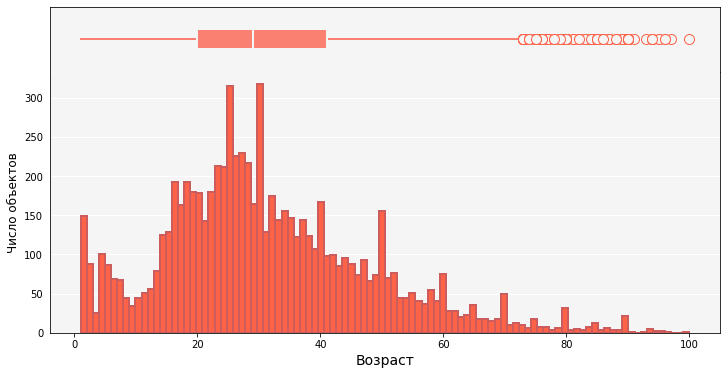

,real_age
min,1.000
mean,31.201
50%,29.000
max,100.000


In [9]:
plot_distribution(df['real_age'], 'Возраст', bins=100, figsize=(12,6))
df['real_age'].describe().to_frame().loc[['min', 'mean', '50%', 'max']]

* Распределение бимодально: виден высокий пик в области 30 лет и более низкий около нуля. Средний возраст ~30 лет. 
* В выборке довольно мало фотографий детей-подростков (10-16 лет) и людей старше 70 лет $\to$ модель может хуже определять этот возраст.

## Размер фото

Теперь посмотрим на размеры фотографий.

In [10]:
image_size_x = []
image_size_y = []
for file_name in df['file_name']:
    image = Image.open('final_files/' + file_name)
    image_size_x.append(image.size[0])
    image_size_y.append(image.size[1])

In [11]:
df['size_x'] = image_size_x
df['size_y'] = image_size_y
df['ratio'] = df['size_x'] / df['size_y']

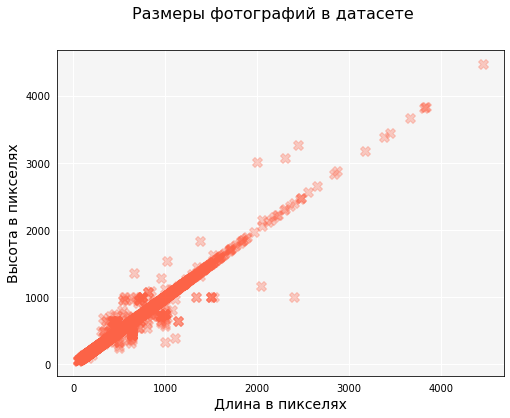

,size_x,size_y,ratio
min,47.000,47.000,0.466
mean,464.734,464.094,1.003
50%,385.000,384.000,1.000
max,4466.000,4466.000,2.985


In [12]:
plot_scatter(
    df['size_x'], df['size_y'], 'Длина в пикселях', 'Высота в пикселях',
    'Размеры фотографий в датасете', figsize=(8,6)
)
df[['size_x', 'size_y', 'ratio']].describe().loc[['min','mean','50%','max']]

Большинство фотографий в выборке квадратные, средний размер 400$\times$400.  
Посмотрим на самую маленькую/большую фото и фото с самым маленьким/большим отношением длины к высоте.

In [13]:
extr_files = df[
    df['size_x'].isin([df['size_x'].min(), df['size_x'].max()]) |
    df['size_y'].isin([df['size_y'].min(), df['size_y'].max()]) |
    df['ratio'].isin([df['ratio'].min(), df['ratio'].max()])
].drop_duplicates()
extr_images = [np.array(Image.open('final_files/' + file)) for file in extr_files['file_name']]

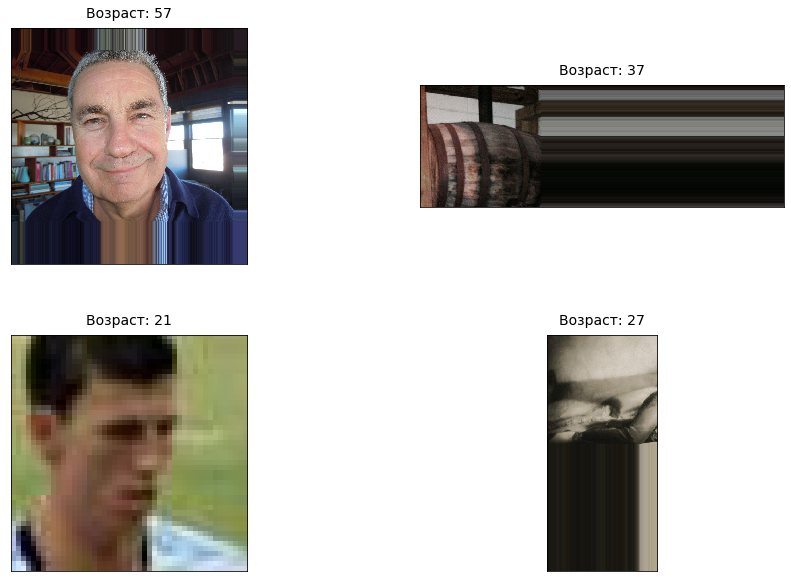

In [14]:
plot_photos(extr_images, extr_files['real_age'].values, size=(2, 2), figsize=(15,10))

* Видим, что на фото с самым низким разрешением лицо человека вполне различимо $\to$ на маленьких фото тоже можно обучать модель.
* Неквадратные изображения дефомированы — видны многочисленные повторяющиеся строки. Возможно, это объясняется тем, что в исходном датасете на фотографиях вырезалось лицо человека, а оставшаяся часть заполнялась последней строкой. Кроме того, на этих фотографиях лица были неправильно найдены.  
Возможно, будет лучше удалить прямоугольные фото из выборки. Загрузим ещё несколько изображений с `ratio`, отличным от единицы.

In [15]:
rect_images = df[(df['ratio'] > 1.5) | (df['ratio'] < 2/3)].sample(8, random_state=42)
images = [np.array(Image.open('final_files/' + file)) for file in rect_images['file_name']]

Доля неквадратных фото: 0.289


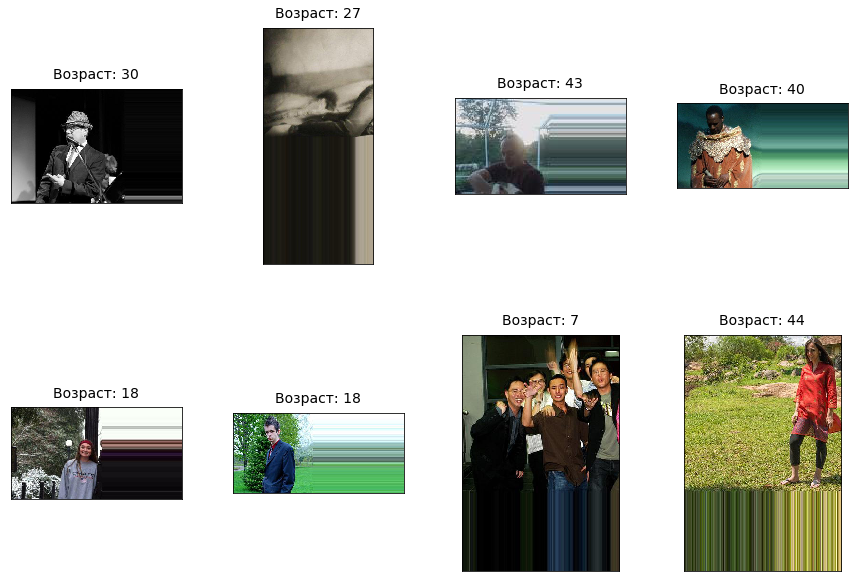

In [16]:
print('Доля неквадратных фото: {:.3f}'.format((df['ratio'] != 1).sum() / len(df)))
plot_photos(images, rect_images['real_age'].values, size=(2,4), figsize=(15,10))

* Неквадратные фото составляют почти 30% выборки, на большинстве различимы лица людей, поэтому удалять их не будем. 
* Практически на всех фото есть повторяющиеся строки. Имеет смысл обрезать эту часть изображения: так мы избавимся от лишней информации и приблизим значение `ratio` к единице.  
* Также заметим, что помимо портретных фото в датасете есть фото в полный рост и групповые фото, что может усложнить обучение модели.

In [17]:
def cut_image(image):
    """ Функция обрезает повторяющиеся строки на прямоугольных изображениях """
    x, y, _ = image.shape
    if x == y:
        return image
    _, raw_index = np.unique(image[:,:,0], axis=0, return_index=True)
    _, col_index = np.unique(image[:,:,0], axis=1, return_index=True)
    return image[min(raw_index):max(raw_index)+1, min(col_index):max(col_index)+1, :]

Обрежем повторяющиеся строки на прямоугольных изображениях и сохраним предобработанную выборку в папке `/final_files_preprocessed`.

Посмотрим, как изменились 8 изображений, рассмотренных выше.

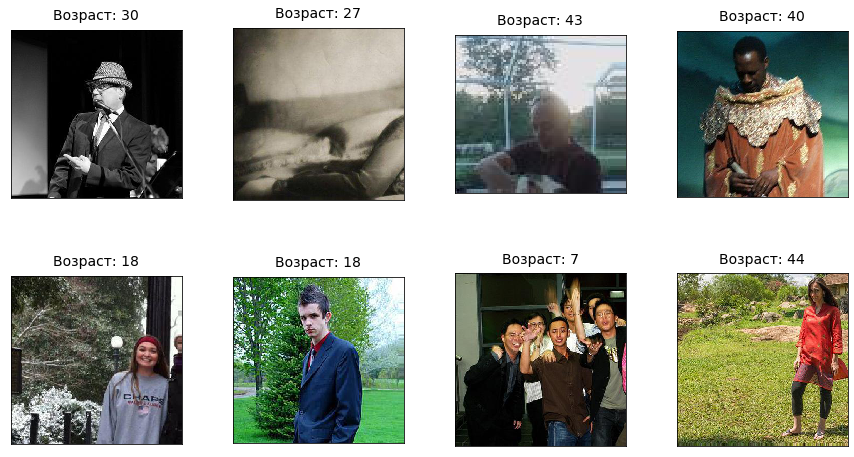

In [18]:
cut_images = [np.array(Image.open('final_files_preprocessed/' + file)) for file in rect_images['file_name']]
plot_photos(cut_images, rect_images['real_age'].values, size=(2, 4), figsize=(15,8))

Видим, что ненужные куски фотографий были обрезаны. Кроме того, теперь фото стали более квадратными $\to$ `resize` не приведёт к сильной деформации пропорций лица :)

## Создание загрузчика

In [19]:
def load_train(path, rescale=1./255., hor_flip=False, batch_size=16, target_size=(224, 224),
               fw_normalization=False, sw_normalization=False):
    """ Функция создаёт загрузчик изображений обучающей выборки """
    train_datagen = ImageDataGenerator(
        validation_split=0.25, rescale=rescale, horizontal_flip=hor_flip, 
        samplewise_std_normalization=sw_normalization, samplewise_center=sw_normalization,
        featurewise_std_normalization=fw_normalization, featurewise_center=fw_normalization
    )
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'), directory=path + 'final_files', 
        x_col='file_name', y_col='real_age',
        target_size=target_size, batch_size=batch_size, class_mode='raw', subset='training', seed=42
    )  
    return train_datagen_flow

In [20]:
def load_test(path, rescale=1./255., batch_size=16, target_size=(224, 224),
              fw_normalization=False, sw_normalization=False):
    """ Функция создаёт загрузчик изображений тестовой выборки """
    test_datagen = ImageDataGenerator(
        validation_split=0.25, rescale=rescale, 
        samplewise_std_normalization=sw_normalization, samplewise_center=sw_normalization,
        featurewise_std_normalization=fw_normalization, featurewise_center=fw_normalization
    )
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'), directory=path + 'final_files', 
        x_col='file_name', y_col='real_age',
        target_size=target_size, batch_size=batch_size, class_mode='raw', subset='validation', seed=42
    )  
    return test_datagen_flow

In [21]:
datagen_flow = load_train('')

Found 5694 validated image filenames.


Фотографии из обучающей выборки были найдены :) Выведем 12 случайных.

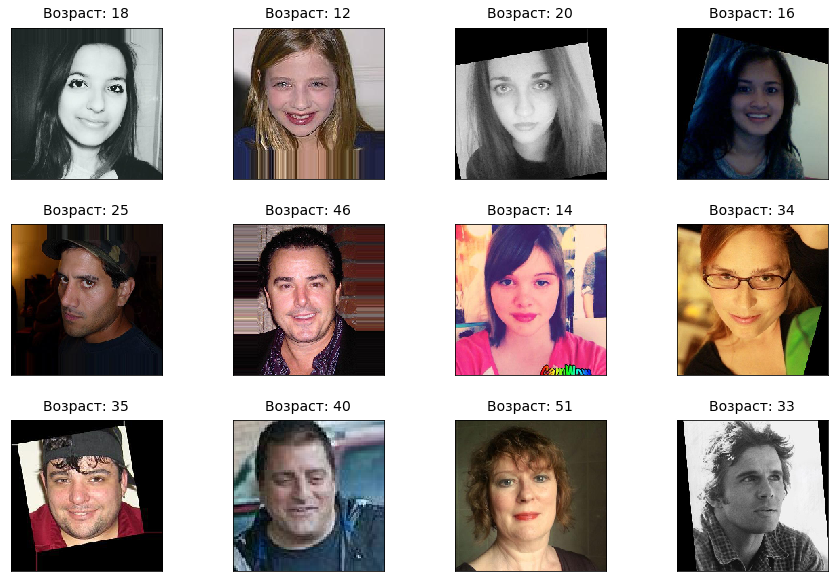

In [22]:
photos_batch, ages_batch = next(datagen_flow)
plot_photos(photos_batch, ages_batch, size=(3,4), figsize=(15,10))

## Вывод <a class="tocSkip">

В выборке 7591 фотографий людей возраста от 1 до 100 лет. 
* Средний возраст ~30 лет. В датасете относительно мало фотографий подростков, поэтому с контролем продажи алкоголя несовершеннолетним могут возникнуть проблемы. Фотографий пожилых людей также довольно мало. 
* Большинство фотографий портретные, однако встречаются фото в полный рост, групповые, а также фото, на которых  отсутствуют люди. 
* Размеры фото варьируются от 47$\times$47 до 4466$\times$4466. Средний размер 400$\times$400. На фото с низким разрешением лица людей различимы.
* Более 70% фотографий в датасете квадратные. На многих неквадратных фотографиях после вырезания лица остался дефект в виде многочисленных строк/столбцов из повторяющихся пикселей.

# Обучение модели 
[к оглавлению](#start)

Итак, перед нами задача регресии, метрика качества MAE. Оценивать качество модели будем на валидационной выборке.  
Сохраним истинные значения таргета в обучающей и валидационной выборках.

In [23]:
test_datagen_flow = load_test('')
target_test = []
for i in range(1897//16 + 1):
    _, t = next(test_datagen_flow)
    target_test += list(t)
target_test = pd.Series(target_test)

Found 1897 validated image filenames.


In [24]:
target_train = list(df['real_age']) 
for t in target_test:
    target_train.remove(t)
target_train = pd.Series(target_train)

### Константная модель <a class="tocSkip">
    
Константная модель предскажет медианный возраст людей из обучающей выборки.

In [25]:
prediction_const =  pd.Series([np.median(target_train)] * len(target_test))

In [26]:
def get_scores(true, pred, index):
    scores = pd.DataFrame({
        'MAE': mean_absolute_error(true, pred),
        'RMSE': mean_squared_error(true, pred)**0.5,
        'R2': r2_score(true, pred), 
        'max_error': max_error(true, pred),
    }, index=[index])
    scores.index.name = 'Модель'
    return scores

In [27]:
scores = get_scores(target_test, prediction_const, 'Константная модель')
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000


Качество константной модели неплохое, средняя ошибка 13 лет.
___
Перейдём к обучению моделей. Для решения задачи будем использовать нейронные сети: рассмотрим несколько полносвязных и свёрточных сетей и подберём для каждой оптимальные гиперпараметры.

(Предсказания всех обученных моделей на валидационной выборке сохранены в файле `results.csv`.)

In [28]:
results = pd.read_csv('results.csv')

## Полносвязные сети
### Линейная регрессия

Сначала рассмотрим самую простую модель — линейную регрессию. Создадим сеть из полносвязного слоя с единственным выходным нейроном и функцией активации *ReLu*. Выберем функцию потерь *MSE* и алгоритм оптимизации *Adam*.

Варьируемые гиперпараметры:
* предобработка изображений
* размер, к которому приводятся изображения, `target_size`
* нормировка `rescale`
* стандартизация *samplewise* или *featurewise*
* добавление отражённых фото `horizontal_flip`
* тип и коэффициент регуляризации `kernel_regularizer`
* скорость обучения в алгоритме *Adam* `lr`
 
Модель с оптимальными гиперпараметрами обучалась так:

In [29]:
model = Sequential()
model.add(Reshape(input_shape=(224, 224, 3), target_shape=(224*224*3,)))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 150529    
Total params: 150,529
Trainable params: 150,529
Non-trainable params: 0
_________________________________________________________________


```python
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
model.fit(
    load_train(path, rescale=1./255., hor_flip=False, target_size=(224, 224)), 
    validation_data=load_test(path, rescale=1./255., target_size=(224, 224)), 
    epochs=5, verbose=2
)
pred_lr = model.predict(load_test(path, rescale=1./255., target_size=(224, 224)))
```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/5
356/356 - 65s - loss: 347.4600 - mae: 14.3645 - val_loss: 335.6143 - val_mae: 14.7980
Epoch 2/5
356/356 - 57s - loss: 304.3173 - mae: 13.5002 - val_loss: 288.7499 - val_mae: 13.5255
Epoch 3/5
356/356 - 54s - loss: 299.8480 - mae: 13.4084 - val_loss: 308.9249 - val_mae: 14.2172
Epoch 4/5
356/356 - 57s - loss: 288.9814 - mae: 13.1991 - val_loss: 288.1209 - val_mae: 13.6465
Epoch 5/5
356/356 - 59s - loss: 282.1123 - mae: 13.0320 - val_loss: 269.4769 - val_mae: 12.8886
Found 1897 validated image filenames.
```

Оптимальной оказалась линейная регрессия без регуляризации. Изображения приводятся к размеру $224\times 224$ и нормируются на $[0,1]$. Скорость обучения довольно маленькая: $lr = 10^{-4}$. Обучение на предобработанных фотографиях (с удалёнными повторяющимися строками) не меняло качество модели.  
Видим, что модель не переобучается: значения функции потерь на обучении и валидации довольно близки. Увеличение числа эпох до 10-15 не привело к значительному улучшению качества, поэтому был выбран `epochs=5`.

In [30]:
pred_lr = results['pred_lr']
scores = pd.concat([scores, get_scores(target_test, pred_lr, 'Линейная регрессия')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417


Модель лишь немного превосходит константную по качеству :(

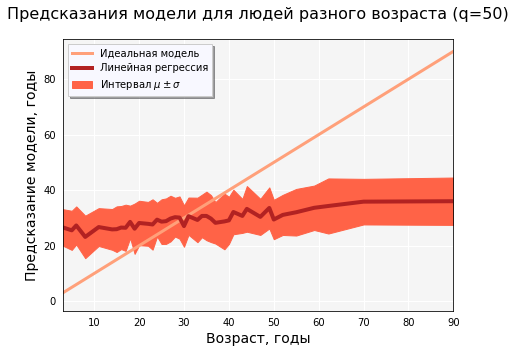

,pred_lr
min,0.000
50%,29.312
mean,29.023
max,55.758


In [31]:
plot_true_pred(target_test, pred_lr, q=50, label='Линейная регрессия')
pred_lr.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

*Пояснение к графику:  
На графике показаны средние значения и разброс предсказаний модели для людей разного возраста. Для репрезентативности данные были разбиты на 50 групп одинакового объёма (параметр `q=50`), т.е. каждая пара $\mu, \sigma$ вычислялась по подвыборке из ~40 объектов. Поскольку распределение таргета неравномерное, в области 20-40 лет точек получилось больше, чем, например, в области 60+.*

Из графика видим, что для людей всех возрастов модель предсказыват в среднем возраст 30 лет $\to$ модель очень похожа на константную.

### Многослойная сеть

Рассмотрим более сложную сеть с несколькими *Dense* слоями. 

In [32]:
model = Sequential()
model.add(Reshape(input_shape=(224, 224, 3), target_shape=(224*224*3,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 9,634,913
Trainable params: 9,634,913
Non-trainable params: 0
_________________________________________________________________


``` python
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
model.fit(
    load_train(path, rescale=1./255., hor_flip=False, target_size=(224, 224)),
    validation_data=load_test(path, rescale=1./255., target_size=(224, 224)), 
    epochs=5, verbose=2
)
pred_dense = model.predict(load_test(path, rescale=1./255., target_size=(224, 224)))
```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/5
356/356 - 103s - loss: 340.4242 - mae: 14.2750 - val_loss: 284.8491 - val_mae: 13.2758
Epoch 2/5
356/356 - 70s - loss: 298.8993 - mae: 13.3769 - val_loss: 269.8446 - val_mae: 12.7907
Epoch 3/5
356/356 - 84s - loss: 286.6836 - mae: 13.0986 - val_loss: 272.9569 - val_mae: 13.1589
Epoch 4/5
356/356 - 73s - loss: 282.3093 - mae: 12.9734 - val_loss: 269.4925 - val_mae: 13.0490
Epoch 5/5
356/356 - 67s - loss: 271.6297 - mae: 12.7681 - val_loss: 258.4341 - val_mae: 12.4845
Found 1897 validated image filenames.
```

В сеть добавлены два полносвязных слоя с 64 и 16 нейронами и функцией активации *ReLu*. Оптимальные гиперпараметры модели не изменились.

In [33]:
pred_dense = results['pred_dense']
scores = pd.concat([scores, get_scores(target_test, pred_dense, 'Полносвязная сеть')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687


Качество немного улучшилось. Похоже, эта модель тоже недообучается, несмотря на то, что число параметров в модели увеличилось на порядок.

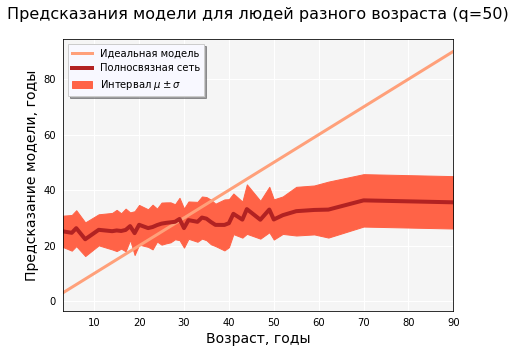

,pred_dense
min,2.061
50%,27.872
mean,28.114
max,61.907


In [34]:
plot_true_pred(target_test, pred_dense, q=50, label='Полносвязная сеть')
pred_dense.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

Модель по-прежнему очень близка к константной :(
___
Таким образом, видим, что полносвязные сети недообучаются. Попробуем обучить свёрточную нейронную сеть.

## Свёрточные сети
### LeNet
Начнём с классической архитектуры *LeNet*.

In [35]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3,3), activation='tanh', input_shape=(32,32,3), padding='same'))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

``` python
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.0005), metrics=['mae'])
model.fit(
    load_train(path, hor_flip=True, target_size=(32, 32), sw_normalization=True, rescale=1./255.),
    validation_data=load_test(path, target_size=(32, 32), sw_normalization=True, rescale=1./255.), 
    epochs=10, steps_per_epoch=None, validation_steps=None, verbose=2
)
pred_lenet = model.predict(load_test(path, target_size=(32, 32), sw_normalization=True, rescale=1./255.))
```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/10
356/356 - 44s - loss: 17.9368 - mae: 17.9368 - val_loss: 13.2305 - val_mae: 13.2305
Epoch 2/10
356/356 - 42s - loss: 13.4484 - mae: 13.4484 - val_loss: 12.8384 - val_mae: 12.8384
Epoch 3/10
356/356 - 41s - loss: 13.2037 - mae: 13.2037 - val_loss: 12.9270 - val_mae: 12.9270
Epoch 4/10
356/356 - 42s - loss: 13.1951 - mae: 13.1951 - val_loss: 12.9109 - val_mae: 12.9109
Epoch 5/10
356/356 - 44s - loss: 13.1947 - mae: 13.1947 - val_loss: 12.9612 - val_mae: 12.9612
Epoch 6/10
356/356 - 45s - loss: 13.1837 - mae: 13.1837 - val_loss: 12.7934 - val_mae: 12.7934
Epoch 7/10
356/356 - 43s - loss: 12.9319 - mae: 12.9319 - val_loss: 12.4267 - val_mae: 12.4267
Epoch 8/10
356/356 - 43s - loss: 12.6778 - mae: 12.6778 - val_loss: 12.1367 - val_mae: 12.1367
Epoch 9/10
356/356 - 43s - loss: 12.3402 - mae: 12.3402 - val_loss: 11.7179 - val_mae: 11.7179
Epoch 10/10
356/356 - 43s - loss: 12.1460 - mae: 12.1460 - val_loss: 11.6128 - val_mae: 11.6128
Found 1897 validated image filenames.
```

В этой модели все фотографии нормируются на $[0,1]$ и стандартизируются (*samplewise*), в выборку добавляются зеркально отражённые изображения. В качестве функции потерь используется *MAE*, скорость обучения алгоритма *Adam* немного выше по сравнению с предыдущими моделями: $lr=5\cdot10^{-4}$. Обучается 10 эпох, дальнейшее обучение практически не меняет *loss*.  
Исходя из значений *loss* на обучении и валидации, можно сказать, что модель снова недообучена.

In [36]:
pred_lenet = results['pred_lenet']
scores = pd.concat([scores, get_scores(target_test, pred_lenet, 'LeNet')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707


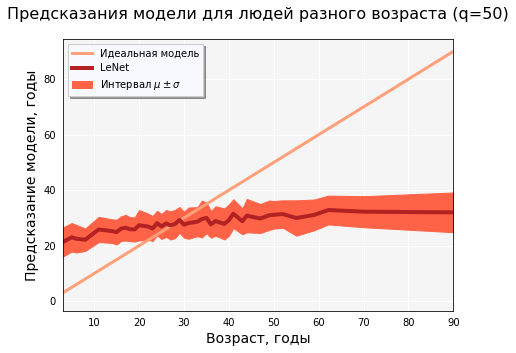

,pred_lenet
min,3.382
50%,27.216
mean,27.634
max,37.935


In [37]:
plot_true_pred(target_test, pred_lenet, q=50, label='LeNet')
pred_lenet.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

Средняя ошибка уменьшилась на 1 год, однако модель всё ещё близка к константной.

### CNN

Попробуем усложнить сеть: добавим ещё свёрточных и полносвязных слоёв, увеличим в них число фильтров и число нейронов соответственно. Кроме того, увеличим размер, к которому будут приводиться фотографии, а в качестве функции активации будем использовать не гиперболический тангенс, а *ReLu*.

Модель с подобранными оптимальными гиперпараметрами обучалась так:

In [38]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=(300,300,3), kernel_size=(7,7), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 294, 294, 96)      14208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 146, 146, 96)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 142, 142, 256)     614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 70, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 68, 68, 384)       885120    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 384)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 418176)           

```python
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
model.fit(
    load_train(path, hor_flip=True, target_size=(300, 300), sw_normalization=True, rescale=1./255.),
    validation_data=load_test(path, target_size=(300, 300), sw_normalization=True, rescale=1./255.), 
    epochs=10, steps_per_epoch=None, validation_steps=None, verbose=2
)
model.predict(load_test(path, target_size=(300, 300), sw_normalization=True, rescale=1./255.))
```

``` 
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/10
356/356 - 1479s - loss: 296.1530 - mae: 13.2421 - val_loss: 243.9533 - val_mae: 12.0029
Epoch 2/10
356/356 - 88s - loss: 254.9536 - mae: 12.3371 - val_loss: 214.9080 - val_mae: 11.3779
Epoch 3/10
356/356 - 88s - loss: 227.6739 - mae: 11.6665 - val_loss: 205.7175 - val_mae: 11.3019
Epoch 4/10
356/356 - 88s - loss: 207.6065 - mae: 11.1263 - val_loss: 191.3716 - val_mae: 10.8785
Epoch 5/10
356/356 - 88s - loss: 185.4319 - mae: 10.4782 - val_loss: 183.2155 - val_mae: 10.3935
Epoch 6/10
356/356 - 88s - loss: 169.3244 - mae: 10.0061 - val_loss: 187.8887 - val_mae: 10.7660
Epoch 7/10
356/356 - 88s - loss: 150.9720 - mae: 9.4640 - val_loss: 164.0477 - val_mae: 9.8496
Epoch 8/10
356/356 - 87s - loss: 134.0736 - mae: 8.8839 - val_loss: 171.9796 - val_mae: 9.8543
Epoch 9/10
356/356 - 87s - loss: 115.1572 - mae: 8.2118 - val_loss: 173.0790 - val_mae: 9.9232
Epoch 10/10
356/356 - 88s - loss: 96.1608 - mae: 7.5490 - val_loss: 164.8018 - val_mae: 9.6505
Found 1897 validated image filenames.
```

Размер изображений в этой модели увеличен до $300\times 300$, все изображения нормируются и стандартизируются, в выборку добавлены зеркально отражённые фото. Из значений функции потерь видно, что модель переобучается.

In [39]:
pred_cnn = results['pred_cnn']
scores = pd.concat([scores, get_scores(target_test, pred_cnn, 'CNN')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707
CNN,9.650,12.838,0.413,64.875


Средняя ошибка уменьшилась на 2 года :)

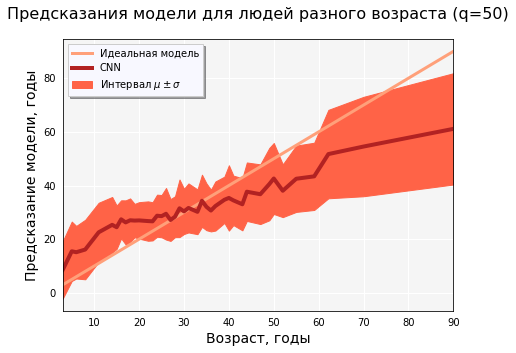

,pred_cnn
min,0.000
50%,28.729
mean,30.436
max,99.168


In [40]:
plot_true_pred(target_test, pred_cnn, q=50, label='CNN')
pred_cnn.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

Предсказания всё ещё далеки от истинных значений, но они, по крайней мере, в среднем возрастают с увеличением реального возраста человека :)

### VGG16
Попробуем для решения задачи использовать модель *VGG*, предобученную на датасете *ImageNet*. Инициализируем веса модели `weights='imagenet'`, размер фото выберем $224\times 244$, поскольку *VGG16* обучалась на таких изображениях. Добавим в сеть *GlobalAveragePooling2D* и один полносвязный слой с активацией *ReLu* для регрессии.

In [41]:
model = Sequential()
model.add(VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


``` python
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
model.fit(
    load_train(path, hor_flip=False, target_size=(224, 224), sw_normalization=True, rescale=None),
    validation_data=load_test(path, target_size=(224, 224), sw_normalization=True, rescale=None), 
    epochs=10, steps_per_epoch=None, validation_steps=None, verbose=2
)
pred_vgg = model.predict(load_test(path, target_size=(224, 224), sw_normalization=True, rescale=None))
```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/10
356/356 - 55s - loss: 8.3963 - mae: 2.1740 - val_loss: 59.7776 - val_mae: 5.7101
Epoch 2/10
356/356 - 55s - loss: 8.3175 - mae: 2.2011 - val_loss: 58.7578 - val_mae: 5.6866
Epoch 3/10
356/356 - 54s - loss: 7.3462 - mae: 2.0314 - val_loss: 61.3117 - val_mae: 5.7976
Epoch 4/10
356/356 - 55s - loss: 7.0964 - mae: 2.0076 - val_loss: 61.3957 - val_mae: 5.9400
Epoch 5/10
356/356 - 54s - loss: 6.1992 - mae: 1.8958 - val_loss: 59.0970 - val_mae: 5.7519
Epoch 6/10
356/356 - 54s - loss: 6.0113 - mae: 1.8293 - val_loss: 56.9724 - val_mae: 5.6156
Epoch 7/10
356/356 - 55s - loss: 6.3895 - mae: 1.8812 - val_loss: 57.1430 - val_mae: 5.6432
Epoch 8/10
356/356 - 54s - loss: 6.2150 - mae: 1.8653 - val_loss: 58.9369 - val_mae: 5.6376
Epoch 9/10
356/356 - 54s - loss: 5.3659 - mae: 1.7236 - val_loss: 58.9601 - val_mae: 5.5995
Epoch 10/10
356/356 - 54s - loss: 4.5450 - mae: 1.6199 - val_loss: 55.7269 - val_mae: 5.5915
Found 1897 validated image filenames.
```

Лучшее качество получилось без нормировки и добавления отражённых фото. Изображения только стандартизируются (*samplewise*). Скорость обучения: $lr = 10^{-4}$.  
Модель сильно переобучается.

In [42]:
pred_vgg = results['pred_vgg']
scores = pd.concat([scores, get_scores(target_test, pred_vgg, 'VGG')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707
CNN,9.650,12.838,0.413,64.875
VGG,5.591,7.465,0.802,35.666


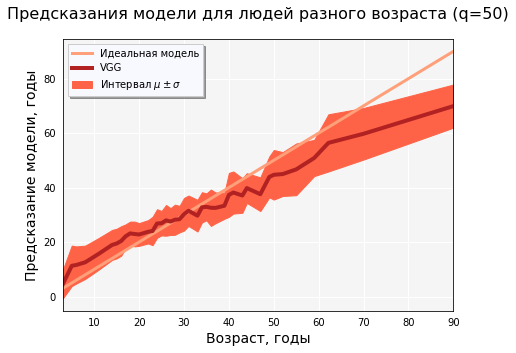

,pred_vgg
min,0.000
50%,27.963
mean,29.544
max,85.025


In [43]:
plot_true_pred(target_test, pred_vgg, q=50, label='VGG')
pred_vgg.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

Качество модели значительно улучшилось: на графике кривая обученной модели очень близка к идеальной, а разброс значений гораздо меньше, чем в предыдущей модели :)  
Модель склонна немного завышать возраст детей-подростков и занижать возраст пожилых людей. Она явно недообучается на объектах >70 лет, т.к. кривая *VGG* в этой области практически выходит на константу. Кроме того, модель ни на одном объекте не предсказала возраст старше 85 лет.

### ResNet

Рассмотрим ещё одну предобученную модель — *ResNet*.

In [44]:
model = Sequential()
model.add(ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


``` python
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
model.fit(
    load_train(path, hor_flip=True, target_size=(224, 224), sw_normalization=True, rescale=None),
    validation_data=load_test(path, target_size=(224, 224), sw_normalization=True, rescale=None), 
    epochs=10, steps_per_epoch=None, validation_steps=None, verbose=2
)
pred_resnet = model.predict(load_test(path, target_size=(224, 224), sw_normalization=True, rescale=None))
```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/10
356/356 - 165s - loss: 204.9915 - mae: 10.4467 - val_loss: 414.6712 - val_mae: 15.6860
Epoch 2/10
356/356 - 157s - loss: 87.9971 - mae: 7.0873 - val_loss: 97.3044 - val_mae: 7.5450
Epoch 3/10
356/356 - 157s - loss: 64.7178 - mae: 6.0954 - val_loss: 88.7770 - val_mae: 7.2476
Epoch 4/10
356/356 - 157s - loss: 47.8386 - mae: 5.2852 - val_loss: 79.6002 - val_mae: 6.4894
Epoch 5/10
356/356 - 157s - loss: 39.4151 - mae: 4.7630 - val_loss: 74.2042 - val_mae: 6.3816
Epoch 6/10
356/356 - 157s - loss: 33.9251 - mae: 4.4525 - val_loss: 71.5985 - val_mae: 6.2624
Epoch 7/10
356/356 - 157s - loss: 26.6284 - mae: 3.9680 - val_loss: 71.1509 - val_mae: 6.4380
Epoch 8/10
356/356 - 157s - loss: 20.8374 - mae: 3.5034 - val_loss: 65.7413 - val_mae: 6.1143
Epoch 9/10
356/356 - 158s - loss: 19.0921 - mae: 3.3558 - val_loss: 66.1975 - val_mae: 6.0521
Epoch 10/10
356/356 - 157s - loss: 17.8410 - mae: 3.2291 - val_loss: 63.4419 - val_mae: 5.8598
Found 1897 validated image filenames.
```

Оптимальные гиперпараметры практически не изменились по сравнению с предыдущей моделью: здесь в выборку добавляются отражённые фотографии.

In [45]:
pred_resnet = results['pred_resnet']
scores = pd.concat([scores, get_scores(target_test, pred_resnet, 'ResNet')])
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707
CNN,9.650,12.838,0.413,64.875
VGG,5.591,7.465,0.802,35.666
ResNet,5.860,7.965,0.774,45.339


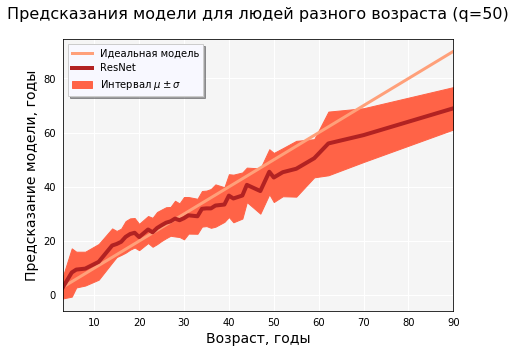

,pred_resnet
min,0.000
50%,26.636
mean,28.764
max,84.804


In [46]:
plot_true_pred(target_test, pred_resnet, q=50, label='ResNet')
pred_resnet.describe().loc[['min', '50%', 'mean', 'max']].to_frame()

График для этой модели очень похож на предыдущий. *MAE* немного выше, но *ResNet* визуально точнее определяет возраст детей. 

# Анализ обученной модели
Ещё раз посмотрим на качество всех моделей.

In [47]:
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707
CNN,9.650,12.838,0.413,64.875
VGG,5.591,7.465,0.802,35.666
ResNet,5.860,7.965,0.774,45.339


Итак, лучшей является модель *VGG*: она превосходит остальные по всем метрикам качества. При этом *ResNet* уступает ей менее, чем на 0.3 года.  
Обе модели очень хорошо определяют возраст людей 25-35 лет, однако для компании важно, чтобы предсказания были точными для людей разных возрастов, в частности, для подростков. Сравним предсказания лучших моделей в разных возрастных группах.

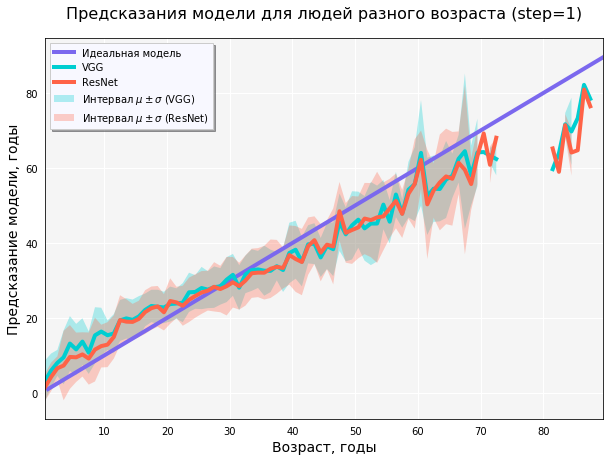

In [48]:
plot_true_pred(target_test, pred_vgg, pred_resnet, step=1, label=['VGG','ResNet'], figsize=(10,7))

*Пояснение к графику:  
На этом графике объеты разделялись на группы не по объёму, а по значениям таргета с шагом в 1 год (параметр `step=1`). Из-за неравномерного распределения таргета функция разрывна — в тестовой выборке отсутствуют фотографии людей  75-80 лет.*

Кривые для моделей *VGG* и *ResNet* практически накладываются друг на друга. Обе модели довольно точно определяют возраст 20-30 лет, в среднем завышают возраст детей-подростков и занижают возраст людей старше 40 лет. На обеих кривых видны 'аномально' точные предсказания для людей 48 и 60 лет, что может объясняться тем, что в тестовой выборке оказалось много людей этих возрастов (см. гистограмму ниже $\downarrow$).

Тем не менее, отличия *VGG* и *ResNet* всё же есть: 
* кривая *VGG* в среднем кажется ближе к идеальной модели, но в области 0-10 лет *ResNet* ощутимо точнее
* разброс предсказанных значений у модели *VGG*  меньше, чем у *ResNet*, в широком возрастном диапазоне

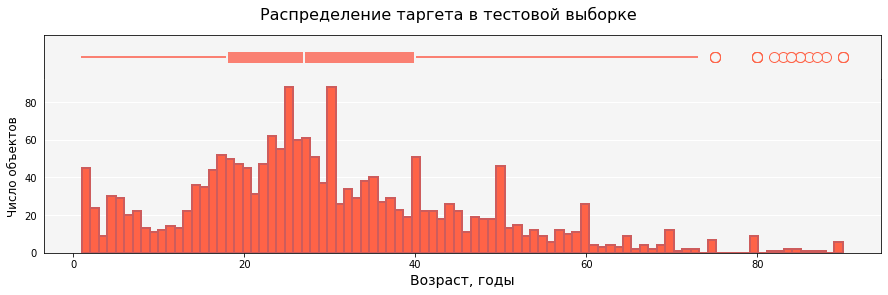

In [49]:
plot_distribution(
    target_test, bins=90, title='Распределение таргета в тестовой выборке', xlabel='Возраст, годы',figsize=(15,4))

Перейдём к анализу остатков.

In [50]:
resid = pd.DataFrame({'true': target_test, 'pred_vgg': pred_vgg, 'pred_resnet': pred_resnet})
resid['delta_vgg'] = resid['pred_vgg'] - resid['true']
resid['delta_resnet'] = resid['pred_resnet'] - resid['true']

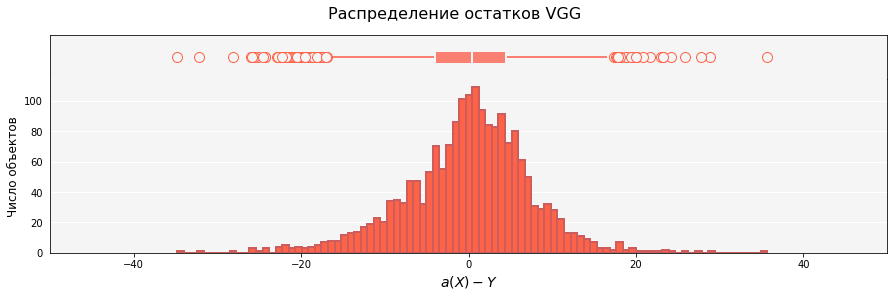

Критерий Шапиро-Уилка: pvalue = 4.2e-15


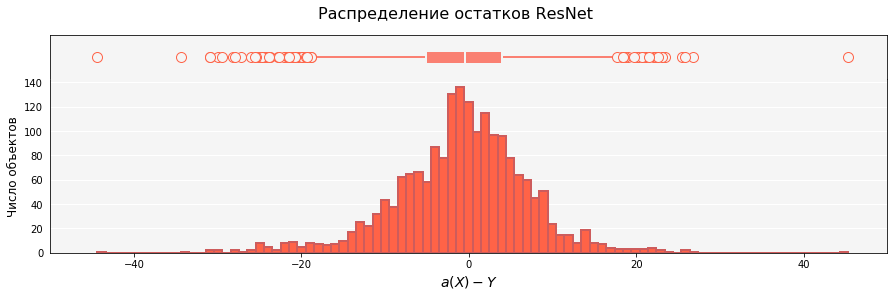

Критерий Шапиро-Уилка: pvalue = 5.1e-18


,delta_vgg,delta_resnet
min,-34.796,-44.382
50%,0.439,-0.463
mean,-0.073,-0.852
max,35.666,45.339


In [51]:
plot_distribution(
    resid['delta_vgg'], title='Распределение остатков VGG', xlabel='$a(X) - Y$', figsize=(15,4), xlim=(-50,50))
print('Критерий Шапиро-Уилка: pvalue = {:.1e}'.format(st.shapiro(resid['delta_vgg'])[1]))
plot_distribution(
    resid['delta_resnet'],title='Распределение остатков ResNet',xlabel='$a(X) - Y$',figsize=(15,4),xlim=(-50,50))
print('Критерий Шапиро-Уилка: pvalue = {:.1e}'.format(st.shapiro(resid['delta_resnet'])[1]))
resid[['delta_vgg', 'delta_resnet']].describe().loc[['min', '50%', 'mean', 'max']]

У обеих моделей распределения остатков унимодальные, несмещённые, у *VGG* визульно ближе к нормальному. Гипотеза нормальности отвергается в обоих случаях, но для *VGG* менее уверенно.

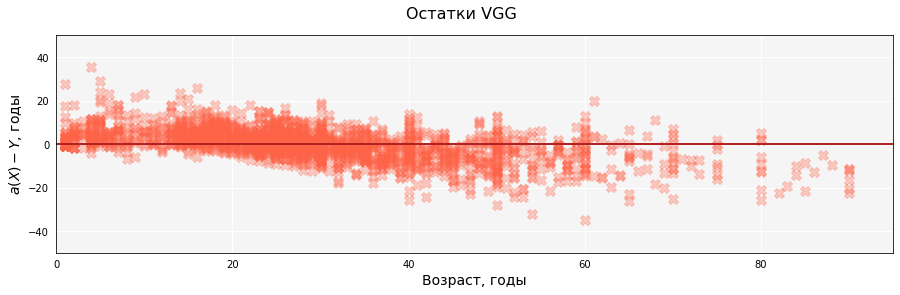

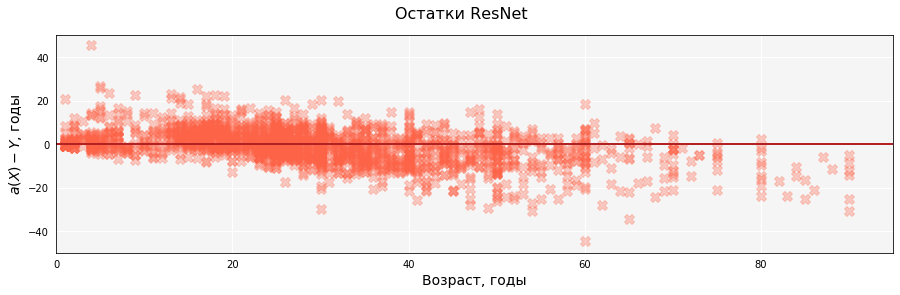

In [52]:
plot_scatter(
    resid['true'], resid['delta_vgg'], 'Возраст, годы', '$a(X) - Y$, годы',
    'Остатки VGG', ylim=(-50,50), zeroline=True)
plot_scatter(
    resid['true'], resid['delta_resnet'], 'Возраст, годы', '$a(X) - Y$, годы',
    'Остатки ResNet', ylim=(-50,50), zeroline=True)

Визуально у *VGG* более сильная зависимость остатков от истинного возраста человека. С другой стороны, у *ResNet* больший разброс остатков и количество выбросов.

# Общий вывод 
[к оглавлению](#start)

Исследование возраста людей на фотографиях завершено.

1. Проведён исследовательский анализ данных. Изучены распределения фотографий по размеру и возрасту изображённых на них людей.
2. Обучены несколько нейронных сетей, определяющих возраст человека на фотографии. Проанализированы сильные и слабые стороны моделей.

### Основные результаты <a class="tocSkip">

1. Качество моделей 

Данные о качестве обученных моделей представлены в таблице (оценка на валидационной выборке):

In [53]:
scores

,MAE,RMSE,R2,max_error
Модель,,,,
Константная модель,12.907,16.771,-0.001,61.000
Линейная регрессия,12.889,16.416,0.041,65.417
Полносвязная сеть,12.484,16.076,0.080,66.687
LeNet,11.613,15.323,0.164,69.707
CNN,9.650,12.838,0.413,64.875
VGG,5.591,7.465,0.802,35.666
ResNet,5.860,7.965,0.774,45.339


* Модели на основе полносвязных нейронных сетей, а также архитектуры *LeNet* недообучены: их качество на уровне константной модели. 
* Нейронная сеть из трёх свёрточных слоёв, чередующихся с *MaxPooling2D*, и с четырьмя полносвязными слоями показала неплохое качество — средняя ошибка 9.7 лет.
* Наиболее точными являются модели на основе предобученных сетей *VGG16* и *ResNet50*.

2. Анализ моделей 

* Модели *VGG* и *ResNet* хорошо определяют возраст 20-35 лет и склонны завышать возраст детей-подростков и занижать возраст пожилых людей. Обе модели завышают возраст подростков 13-18 лет в среднем на 5 лет, поэтому с их помощью не получится контролировать добросовестность кассиров при продаже алкоголя.
* Остатки моделей несмещённые, распределения симметричны, у модели *VGG* разброс остатков меньше.

### Вывод <a class="tocSkip">

Исходя из всей совокупности факторов, лучшей моделью является *VGG* :)